In [12]:
import pymc3 as pm
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [143]:
class Bandits(object):
    
    def __init__(self,hidden_prob):
        self.p = hidden_prob
        self.optimal = np.argmax(hidden_prob)
        self.length = len(hidden_prob)
    
    # 선택된 promo는 0 또는 1을 반환
    def choose(self,i):
        return np.random.rand() < self.p[i]
    
class Thompson(object):
    """
    N : 표본 누적
    choice : 과거 선택 promo 배열
    bb_score : 과거 점수 배열
    """
    def __init__(self,bandit):
        self.bandit = bandit
        n_length = self.bandit.length
        self.buys = np.zeros(n_length)
        self.total = np.zeros(n_length)
        self.N = 0
        self.choices = []
        self.bb_score = []
    
    def sample(self,n=1):

        bb_score = np.zeros(n)
        choices = np.zeros(n)
        
        for k in range(n):
            #sample from the bandits's priors, and select the largest sample
            choice = np.argmax(np.random.beta(1 + self.buys, 1 + self.total - self.buys))
            
            #sample the chosen 0 or 1
            result = self.bandit.choose(choice)
            
            #update priors and score
            self.buys[choice] += result
            self.total[choice] += 1
            bb_score[k] = result 
            self.N += 1
            choices[k] = choice
            
        self.bb_score = np.r_[self.bb_score, bb_score]
        self.choices = np.r_[self.choices, choices]
        return         

In [144]:
bandit = Bandits(hidden_prob)

In [145]:
thompson = Thompson(bandit)

In [165]:
thompson.sample(10)

In [166]:
thompson.total

array([1114.,    2.,   29.,   15.])

In [171]:
beta = stats.beta
x = np.linspace(0.001,.999,200)

def plot_priors(thompson, prob, lw = 3, alpha = 0.2, plt_vlines = True):
    ## plotting function
    buys = thompson.buys
    total = thompson.total
    for i in range(prob.shape[0]):
        y = beta(1 + buys[i], 1 + total[i] - buys[i]) # 업데이트
        p = plt.plot(x, y.pdf(x), lw = lw)
        c = p[0].get_markeredgecolor()
        plt.fill_between(x,y.pdf(x),0, color = c, alpha = alpha, 
                         label="underlying probability: %.2f" % prob[i])
        if plt_vlines:
            plt.vlines(prob[i], 0, y.pdf(prob[i]) ,
                       colors = c, linestyles = "--", lw = 2)
        plt.autoscale(tight = "True")
        plt.title("Posteriors After %d pull" % thompson.N +\
                    "s"*(thompson.N > 1))
        plt.autoscale(tight=True)
    return

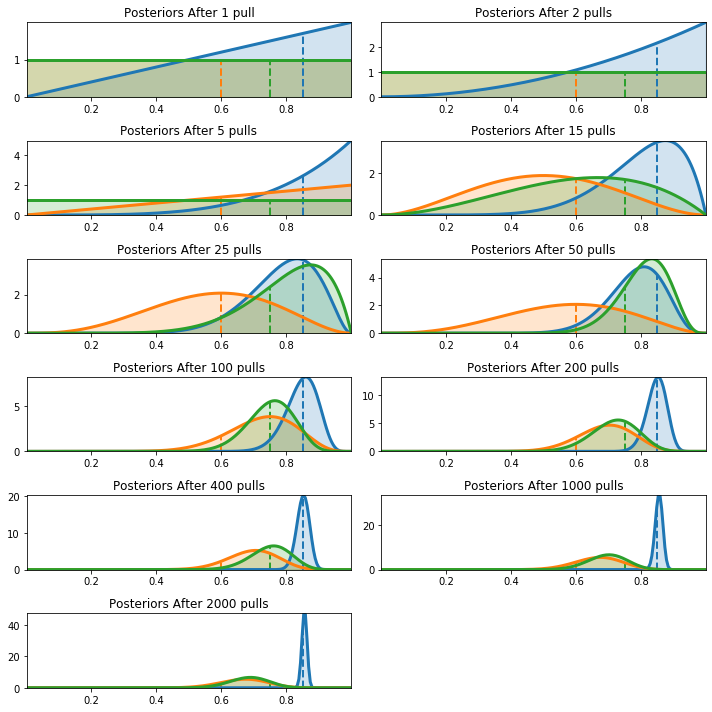

In [175]:
hidden_prob = np.array([0.85, 0.60, 0.75])
bandit = Bandits(hidden_prob)
thompson = Thompson(bandit)
draw_samples = [1, 1, 3, 10, 10, 25, 50, 100, 200, 600, 1000]

fig = plt.figure(figsize=(10, 10))
for j,i in enumerate(draw_samples):
    plt.subplot(6, 2, j+1) 
    thompson.sample(i)
    plot_priors(thompson, hidden_prob)
    #plt.legend()
    plt.autoscale(tight = True)
plt.tight_layout()

In [1]:
# 너무 샘플링이 치우쳐있는데.
# promo를 보여주는 것부터 동일하지 않음.<- 좋은것만 계속 쓰겠다는 말이지. exploit 해야하니. explore만 하는게 아니니깐.
thompson.sample(300)
thompson.buys

NameError: name 'thompson' is not defined